# DS50 : Multi-class classification neural network for electricity prices

## Imports

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
!pip3 install shap
import shap
print("TensorFlow version:", tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 5.4 MB/s 
TensorFlow version: 2.8.2


## Importing data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Axelvel/DS50/main/Datasets/Datasets_Region_France_2016_2020.csv')
df

,Regions,Dates,Heures,Electricite,Gaz,Tmin,Tmax,Tmoy,Taux de Co2
0,Auvergne Rhone-Alpes,01/01/2016,00:00,8114,2226,2.96,10.56,6.76,31
1,Auvergne Rhone-Alpes,01/01/2016,00:30,8012,2227,2.96,10.56,6.76,31
2,Auvergne Rhone-Alpes,01/01/2016,01:00,7789,2205,2.96,10.56,6.76,32
3,Auvergne Rhone-Alpes,01/01/2016,01:30,7749,2212,2.96,10.56,6.76,32
4,Auvergne Rhone-Alpes,01/01/2016,02:00,7724,2209,2.96,10.56,6.76,32
...,...,...,...,...,...,...,...,...,...
1052347,Pays de la Loire,31/12/2020,21:30,3629,5712,2.40,7.60,5.00,35
1052348,Pays de la Loire,31/12/2020,22:00,3583,5583,2.40,7.60,5.00,35
1052349,Pays de la Loire,31/12/2020,22:30,3734,5573,2.40,7.60,5.00,35
1052350,Pays de la Loire,31/12/2020,23:00,4206,5731,2.40,7.60,5.00,35


## Statistical dispersion

[]

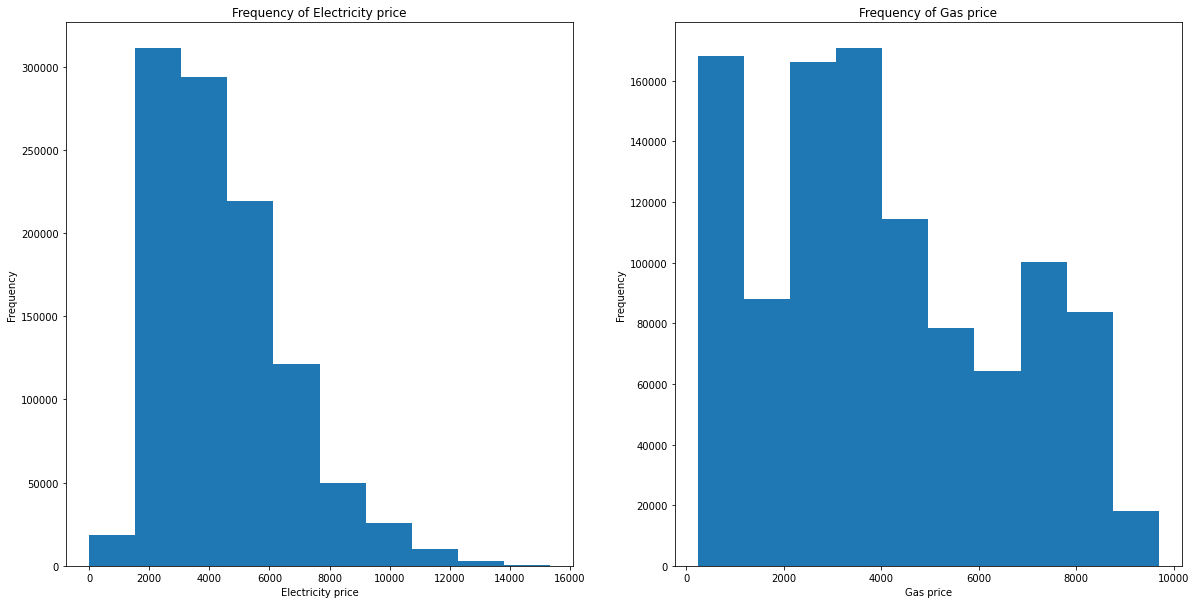

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].hist(df['Electricite'])
ax[0].set_title("Frequency of Electricity price")
ax[0].set_xlabel("Electricity price")
ax[0].set_ylabel("Frequency")
ax[1].hist(df['Gaz'])
ax[1].set_title("Frequency of Gas price")
ax[1].set_xlabel("Gas price")
ax[1].set_ylabel("Frequency")
plt.plot()


## Preprocessing data

### Encoding data

In [5]:
features = ['Regions', 'Dates', 'Heures',	'Tmin',	'Tmax',	'Tmoy', 'Taux de Co2']

#Removing null values
df.replace(0,np.nan, inplace=True)
df.dropna(inplace=True)

#Encoding data using labelEncoder
labelEncoder = LabelEncoder()

encoded_region = labelEncoder.fit_transform(df['Regions'])
encoded_date = labelEncoder.fit_transform(df['Dates'])
encoded_hour = labelEncoder.fit_transform(df['Heures'])

df['Regions'] = encoded_region
df['Dates'] = encoded_date
df['Heures'] = encoded_hour

#Normalizing dataset
df=(df-df.mean())/df.std()

X = df.drop(['Electricite', 'Gaz'], axis=1)

#Balancing labels so each category has the same density
y = pd.qcut(df['Electricite'], q=10, labels=False)

In [6]:
#Normalized dataset
df

,Regions,Dates,Heures,Electricite,Gaz,Tmin,Tmax,Tmoy,Taux de Co2
0,-1.593508,-1.730955,-1.696926,1.694993,-0.732173,-0.938441,-0.934099,-0.972460,-0.510044
1,-1.593508,-1.730955,-1.624742,1.647648,-0.731766,-0.938441,-0.934099,-0.972460,-0.510044
2,-1.593508,-1.730955,-1.552558,1.544138,-0.740703,-0.938441,-0.934099,-0.972460,-0.464570
3,-1.593508,-1.730955,-1.480374,1.525571,-0.737860,-0.938441,-0.934099,-0.972460,-0.464570
4,-1.593508,-1.730955,-1.408191,1.513966,-0.739078,-0.938441,-0.934099,-0.972460,-0.464570
...,...,...,...,...,...,...,...,...,...
1052347,1.592868,1.731606,1.406975,-0.386815,0.683886,-1.036571,-1.323069,-1.247099,-0.328149
1052348,1.592868,1.731606,1.479159,-0.408167,0.631484,-1.036571,-1.323069,-1.247099,-0.328149
1052349,1.592868,1.731606,1.551343,-0.338077,0.627422,-1.036571,-1.323069,-1.247099,-0.328149
1052350,1.592868,1.731606,1.623526,-0.118988,0.691604,-1.036571,-1.323069,-1.247099,-0.328149


[]

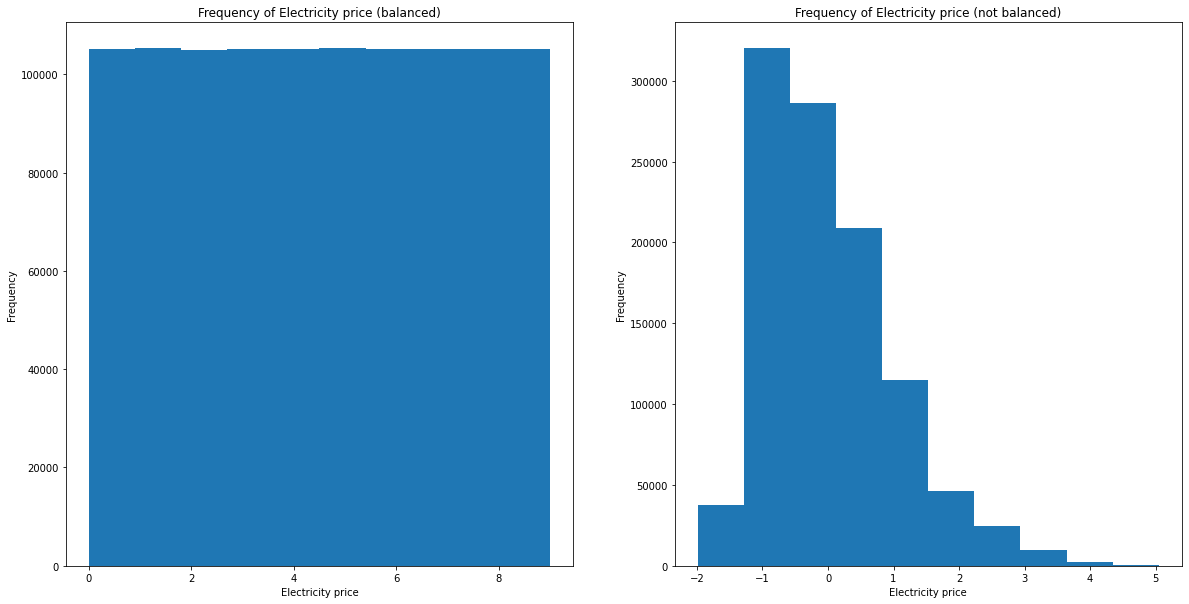

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].hist(y)
ax[0].set_title("Frequency of Electricity price (balanced)")
ax[0].set_xlabel("Electricity price")
ax[0].set_ylabel("Frequency")

ax[1].hist(df['Electricite'])
ax[1].set_title("Frequency of Electricity price (not balanced)")
ax[1].set_xlabel("Electricity price")
ax[1].set_ylabel("Frequency")
plt.plot()

 ### Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Converting to tensors

In [ ]:
#Convert numpyArray to tensor
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

## Building model

### Variables

In [ ]:
lr = 0.0005 #Learning rate
num_epochs = 300 #Number of epochs
batch_size = 64
num_inputs = 7 #Number of inputs
num_classes = 10 #Number of outputs

### Defining layers

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(num_inputs,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='relu'),
  tf.keras.layers.Softmax()
])

### Compiling model

In [ ]:
metrics = ['accuracy']
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=metrics)

## Training model

In [ ]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', patience=2, verbose=1), tf.keras.callbacks.EarlyStopping(monitor='accuracy', mode='max', patience=5, verbose=1)]

history = model.fit(X_train, y_train, epochs=num_epochs, callbacks=callbacks, batch_size=batch_size)

Epoch 1/300
13147/13147 [==============================] - 52s 4ms/step - loss: 1.1201 - accuracy: 0.5361
Epoch 2/300
13147/13147 [==============================] - 33s 3ms/step - loss: 0.9029 - accuracy: 0.6102
Epoch 3/300
13147/13147 [==============================] - 34s 3ms/step - loss: 0.8714 - accuracy: 0.6213
Epoch 4/300
13147/13147 [==============================] - 34s 3ms/step - loss: 0.8545 - accuracy: 0.6278
Epoch 5/300
13147/13147 [==============================] - 34s 3ms/step - loss: 0.8421 - accuracy: 0.6329
Epoch 6/300
13147/13147 [==============================] - 35s 3ms/step - loss: 0.8327 - accuracy: 0.6372
Epoch 7/300
13147/13147 [==============================] - 38s 3ms/step - loss: 0.8234 - accuracy: 0.6409
Epoch 8/300
13147/13147 [==============================] - 34s 3ms/step - loss: 0.8157 - accuracy: 0.6446
Epoch 9/300
13147/13147 [==============================] - 34s 3ms/step - loss: 0.8092 - accuracy: 0.6473
Epoch 10/300
13147/13147 [====================

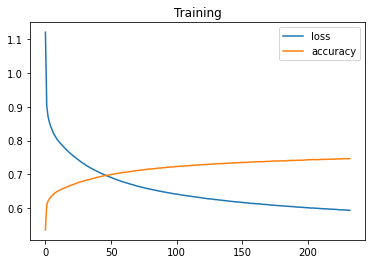

In [ ]:
plt.title('Training')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.show();

## Testing model

### Testing accuracy

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

6574/6574 - 8s - loss: 0.6250 - accuracy: 0.7344 - 8s/epoch - 1ms/step

Test accuracy: 0.7344077825546265


### Making predictions

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predicted_values = np.empty(shape=(len(predictions)))
for i in range(len(predictions)):
  a = predictions[i]
  max = np.max(a)
  predicted_values[i] = np.argmax(a)


### Mean Absolute Error (MEA)

In [ ]:
#Computing absolute error values
errors = abs(predicted_values - y_test.numpy())

print('Mean Absolute Error :', round(np.mean(errors), 2))

Mean Absolute Error : 0.28


### F1 score

In [ ]:
f1_score = sk.metrics.f1_score(y_test.numpy(), predicted_values, average = 'macro')
print("The F1 score is : ", f1_score)

The F1 score is :  0.7352379201216552


### Feature importance

In [ ]:
shap_samples = 100
e = shap.KernelExplainer(model, shap.sample(X_train.numpy(), shap_samples))
shap_values = e.shap_values(shap.sample(X_test.numpy(),shap_samples))


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
shap.initjs()

# Using a force plot to visualize the first prediction's explanation
shap.force_plot(e.expected_value[0], shap_values[0][0], features = features)


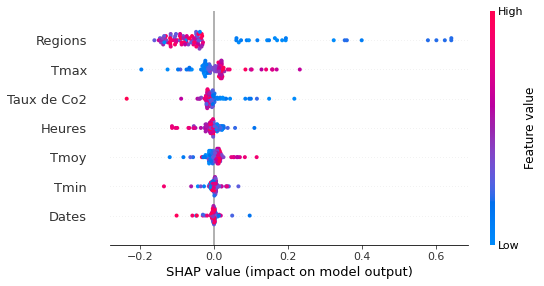

In [ ]:
shap.summary_plot(shap_values[0], shap.sample(X_test.numpy(),shap_samples), feature_names=features)